In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Audio
from helpers.filters import highpass, lowpass

# Introduction to Probability

Let's begin by making a bet...

We will flip a coin multiple times and count the number of times heads ($H$) and tails ($T$) appear. 

If after $10$ flips there are $5$ $H$ and $5$ $T$, I win. Otherwise I lose.

In [2]:
num_flips = 10    # The number of times to flip the coin
prob_heads = 0.5  # The probability of getting heads (0.5=fair coin)
num_heads = np.random.binomial(n=num_flips,p=prob_heads)
print(num_heads," heads, ",num_flips - num_heads, " tails.")

3  heads,  7  tails.


If we play the bet repeatedly, I will be the loser... Why is that?

How many outcomes are there for flipping a coin $10$ times? The first flip could be $H$ or $T$, the second flip could be $H$ or $T$, and so on...

$$2\cdot 2\cdot 2\cdot 2\cdot 2\cdot 2\cdot 2\cdot 2\cdot 2\cdot 2\cdot  = 2^{10} = 1024$$  

Of those $1024$ ways, there are "$10$ choose $5$" = $252$ ways to have $5$ $H$ and $5$ $T$.

$$P(H=5 \ \ and \ \ T=5) = \frac{252}{1024} = 0.246$$

Let's try another bet. We will flip the coin $\bf{100}$ times. If there are $49$, $50$, or $51$ $H$, I win.

In [3]:
num_flips = 100    # The number of times to flip the coin
prob_heads = 0.5  # The probability of getting heads (0.5=fair coin)
num_heads = np.random.binomial(n=num_flips,p=prob_heads)
print(num_heads," heads, ",num_flips - num_heads, " tails.")

53  heads,  47  tails.


Now I'm getting desperate... Let's try one last bet. We will flip the coin $\bf{1,000,000,000}$. If the number of heads is between $49\%-51\%$, I win. Keep in mind, this is basically the same bet as the last one!

In [4]:
num_flips = 1000000000  # The number of times to flip the coin
prob_heads = 0.5        # The probability of getting heads (0.5=fair coin)
num_heads = np.random.binomial(n=num_flips,p=prob_heads)
percent_heads = num_heads/num_flips*100
print(percent_heads,"% heads, ",100 - percent_heads, "% tails.")

49.9998738 % heads,  50.0001262 % tails.


This is demonstrates what is known as *The Law of Large Numbers*. Basically, as more and more random events happen, the outcomes resemble the expected behavior more and more closely.

If you ask anybody, they would say that the probability of flipping a heads is $1/2$, yet nobody is surprised if you flip a tails twice in a row!

But if you flipped $100$ heads in a row, that would be a different story. This is because of the law of large numbers.

Let's do an experiment where we flip a coin and keep track of the fraction of flips that come up heads to see how the random flips tend towards the expected behavior:

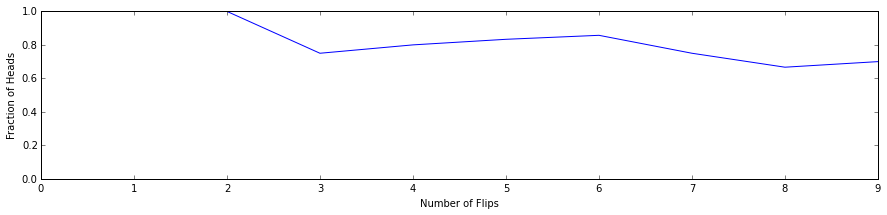

In [5]:
num_flips = 10   # Try changing number of flips
prob_heads = 0.5   # Try changing expected behavior
plt.figure(figsize=(15,3))
for trial in range(1):  # Try repeating the experiment
    averages = np.zeros(num_flips); total = 0
    for i in range(num_flips):
        total += np.random.binomial(n=1,p=prob_heads)
        averages[i] = total/(i+1)
    plt.plot(averages)
plt.ylim([0,1])
plt.ylabel('Fraction of Heads'); plt.xlabel('Number of Flips');

A *probability distribution* tells us the probability of each outcome of a random event or experiment.

The coin flip is an example of a *uniform distribution* where every outcome (in this case $H$ and $T$) is equally likely. Another example of this is rolling a die.

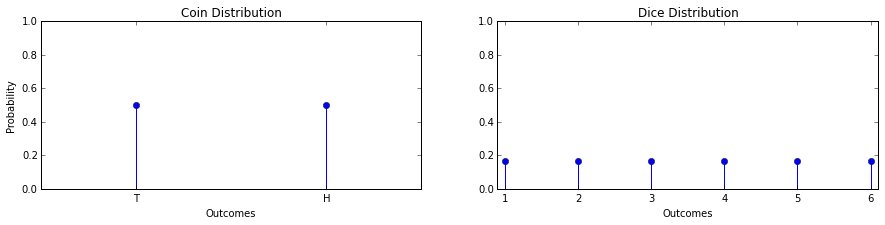

In [6]:
def plot_distributions():
    plt.figure(figsize=(15,3))
    plt.subplot(1,2,1)
    plt.stem([0,0.2],[0.5,0.5])
    plt.xticks([0,0.2],['T','H'])
    plt.xlim([-0.1,0.3])
    plt.ylim([0,1])
    plt.title('Coin Distribution')
    plt.ylabel('Probability')
    plt.xlabel('Outcomes')
    plt.subplot(1,2,2)
    plt.stem(range(1,7),[1/6]*6)
    plt.xlim([0.9,6.1])
    plt.ylim([0,1])
    plt.title('Dice Distribution')
    plt.xlabel('Outcomes');
plot_distributions();

Another very common distribution is the *normal distribution*, shaped like a bell curve.

Normal distributions appear naturally in many different scenarios. A classic example is test scores. In this case, we can think of each student's test result as the outcome of a random experiment.

In engineering, one *very* common appearance of the normal distibution is **random noise**. Below we'll generate random noise.

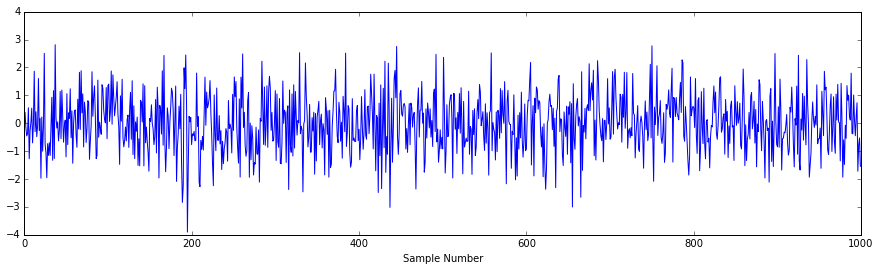

In [7]:
noise = np.random.randn(1000)
plt.figure(figsize=(15,4));plt.plot(noise);
plt.xlabel('Sample Number'); plt.ylim([-4,4]);

In [8]:
noise = np.random.randn(44100*5); Audio(noise,rate=44100)

A *histogram* shows the number of occurrences of each outcome. Let's use a histogram to estimate the distribution of the random noise samples.

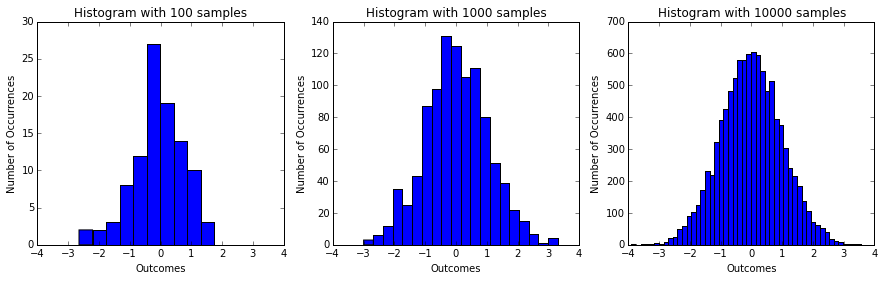

In [9]:
plt.figure(figsize=(15,4))
for (num_samples,num_bins) in [(100,10),(1000,20),(10000,50)]:
    plt.subplot(1,3,int(np.log10(num_samples)-1))
    noise = np.random.randn(num_samples)
    plt.hist(noise,bins=num_bins); 
    plt.xlim([-4,4]);
    plt.xlabel('Outcomes'); 
    title = 'Histogram with '+str(num_samples)+' samples'
    plt.title(title)
    plt.ylabel('Number of Occurrences');

Let's look at how the histogram and noise signal over time are related:

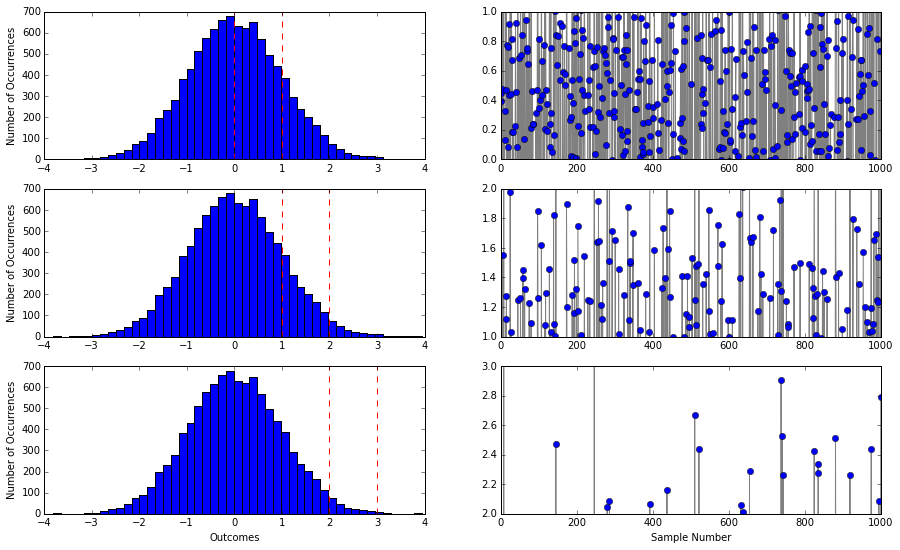

In [10]:
plt.figure(figsize=(15,9))
noise = np.random.randn(10000)
for (low,high) in [(0,1),(1,2),(2,3)]:
    plt.subplot(3,2,(high-1)*2+1)
    plt.hist(noise,bins=50);
    plt.plot([low,low],[0,700],'r--')
    plt.plot([high,high],[0,700],'r--')
    plt.xlim([-4,4])
    plt.ylim([0,700])
    if(high==3):
        plt.xlabel('Outcomes'); 
    plt.ylabel('Number of Occurrences');
    plt.subplot(3,2,(high-1)*2+2)
    plt.plot(noise[0:1000],'gray')
    plt.plot(noise[0:1000],'o')
    plt.ylim([low,high])
    if(high==3):
        plt.xlabel('Sample Number');

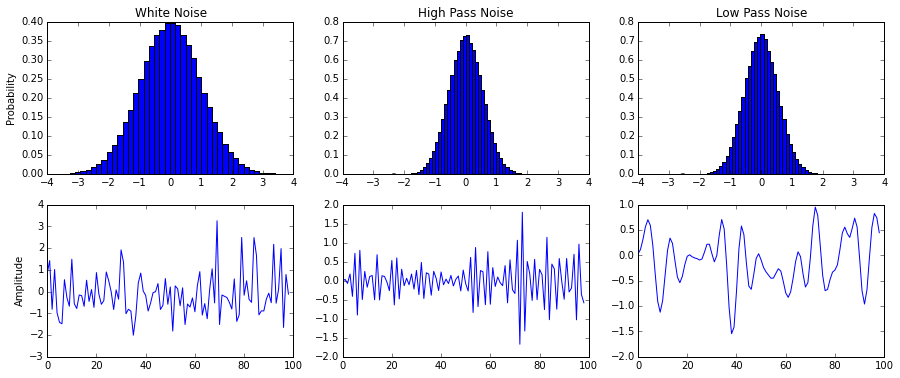

In [46]:
def gen_noise_plots():
    noise = np.random.randn(44100*5); Audio(noise,rate=44100)
    high_noise = highpass(data=noise,fs=1,cutoff=0.35)
    low_noise = lowpass(data=noise,fs=1,cutoff=0.15)
    plt.figure(figsize=(15,6))
    plt.subplot(2,3,1);
    plt.title("White Noise")
    plt.hist(noise,bins=50,normed=True);
    plt.xlim([-4,4])
    plt.ylabel("Probability")
    plt.subplot(2,3,2);
    plt.title("High Pass Noise")
    plt.hist(high_noise,bins=50,normed=True);
    plt.xlim([-4,4])
    plt.subplot(2,3,3);
    plt.title("Low Pass Noise")
    plt.hist(low_noise,bins=50,normed=True);
    plt.xlim([-4,4])
    plt.subplot(2,3,4);
    plt.plot(noise[1:100])
    plt.ylabel('Amplitude')
    plt.subplot(2,3,5);
    plt.plot(high_noise[1:100])
    plt.subplot(2,3,6);
    plt.plot(low_noise[1:100]);
gen_noise_plots()